### 0.데이터 다운로드

In [ ]:
!git clone https://github.com/Soyoung-Yoon/data_02

Cloning into 'data_02'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 38 (delta 7), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (38/38), 438.32 KiB | 4.52 MiB/s, done.


In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

Cloning into 'bigdata'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 53 (delta 0), reused 0 (delta 0), pack-reused 50
Unpacking objects: 100% (53/53), 14.21 MiB | 4.26 MiB/s, done.


In [ ]:
import scipy
scipy.__version__

'1.10.0'

In [ ]:
!pip install scipy==1.10.0

In [ ]:
#설치(install) 후 메뉴에서 런타임 - 런타임 다시 시작

### 확률분포 그리기

### 1.이산형 확률분포 
- Probability Mass Function, PMF, 𝐲=𝒇(𝒙)
- 이산 확률 변수에서 특정 값에 대한 확률을 계산하기 위한 함수

#### 1-1.기하 분포

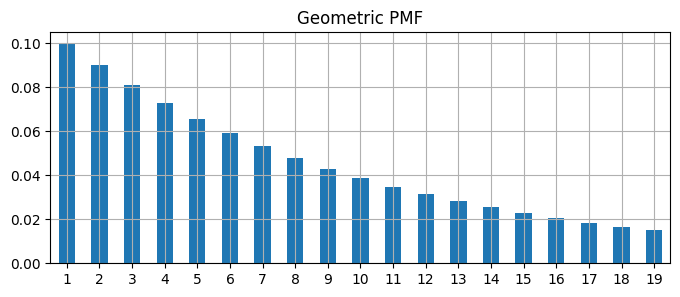

In [ ]:
# 확률이 0.1인 기하분포
from scipy.stats import geom
import matplotlib.pyplot as plt  # 시험무관
import pandas as pd 

sp = 0.1
x = range(1, 20)  # 시도 횟수
y = geom(p=sp).pmf(x)
# 시험무관
s = pd.Series(y, index=x)
s.plot(kind='bar', figsize=(8, 3), rot=0, grid=True, title='Geometric PMF')
plt.show()

#### 1-2.초기하 분포

[3.02032885e-04 3.55332806e-03 1.88258054e-02 5.96742510e-02
 1.26807783e-01 1.91825592e-01 2.14091063e-01 1.80287211e-01
 1.16176457e-01 5.77600464e-02 2.22376179e-02 6.62820205e-03
 1.52341741e-03 2.67853610e-04 3.55743076e-05 3.50270105e-06
 2.48771382e-07 1.22310776e-08 3.89715707e-10 7.13438366e-12
 5.60558716e-14 0.00000000e+00]


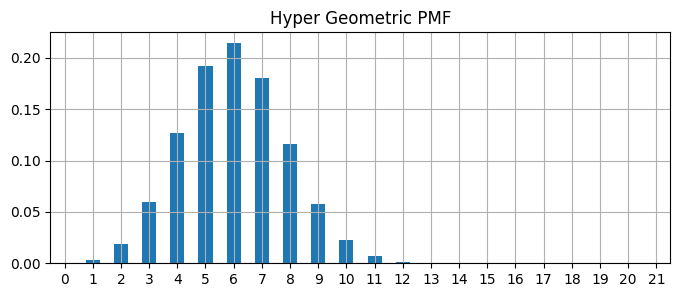

In [ ]:
# M : 모집단 개수, n : 성공요소의 수, N : 시행횟수(선택 횟수)
# M, n, N = 100, 30, 20

from scipy.stats import hypergeom
import matplotlib.pyplot as plt  # 빅분기 시험무관, ADP (필요)
import pandas as pd

a, b, c = 100, 30, 20
x = range(c+2)  # 0 ~ 21
y = hypergeom(M=a, n=b, N=c).pmf(x)
print(y)
s = pd.Series(y, index=x)
#print(s.to_numpy())
s.plot(kind='bar', figsize=(8, 3), grid=True, rot=0, 
       title='Hyper Geometric PMF')
plt.show()

[0.029412 0.196078 0.392157 0.294118 0.081699 0.006536 0.      ]


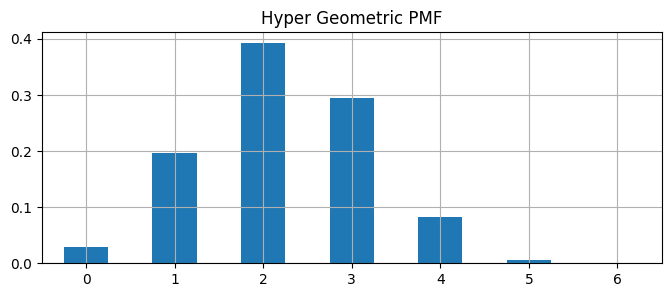

In [ ]:
# M : 모집단 개수, n : 성공요소의 수, N : 시행횟수(선택 횟수)

from scipy.stats import hypergeom
import matplotlib.pyplot as plt  # 빅분기 시험무관, ADP (필요)
import pandas as pd

a, b, c = 18, 8, 5
x = range(c+2)  
y = hypergeom(M=a, n=b, N=c).pmf(x)
s = pd.Series(y, index=x)
print(s.to_numpy().round(6))
s.plot(kind='bar', figsize=(8, 3), grid=True, rot=0, 
       title='Hyper Geometric PMF')
plt.show()

#### 1-3.포아송 분포

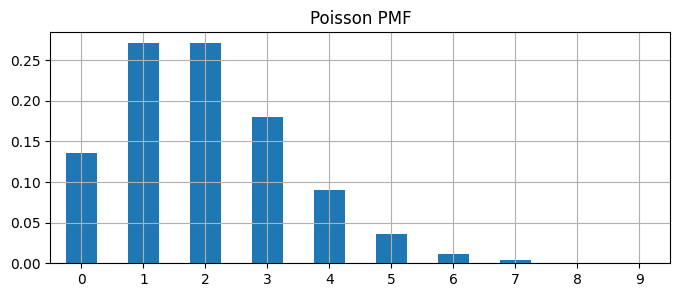

In [ ]:
# mu = 단위 시간/공간당 평균 발생 횟수
# 평균 2회 발생 횟수를 갖는 포아송 분포

from scipy.stats import poisson
import pandas as pd
import matplotlib.pyplot as plt
mu = 2
x = range(5*mu)
y = poisson(mu=mu).pmf(x)
s = pd.Series(y, index=x)
s.plot(kind='bar', figsize=(8, 3), rot=0, grid=True, title='Poisson PMF')
plt.show()

### 2.연속형 확률분포 객체 생성

PDF(Probability Density Function) : 확률 밀도 함수
- 연속적인 변수에 의한 확률 분포 함수
- 항상 양의 값을 가져야 하며, 모든 범위의 PDF를 합한 값은 1임
- f(x) >= 0
- 분포내 특정 값에서의 확률은 0, P(X=a) = 0, 정의된 범위 내에서의 확률은 범위내의 pdf 영역 넓이(적분값)가 됨

#### 2-1. 표준정규분포

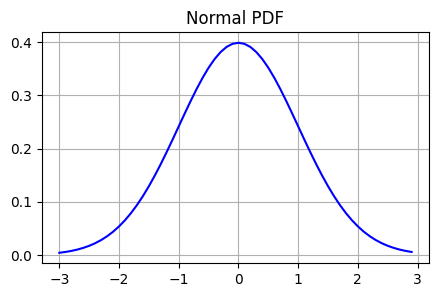

In [ ]:
# 표준정규분포 객체 생성 및 그래프 그리기
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rv = norm(loc=0, scale=1)  # loc=평균, scale=표준편차
x = np.arange(-3, 3, 0.1)
y1 = rv.pdf(x)
y2 = norm.pdf(x, loc=0, scale=1)
normal = pd.Series(y2, index=x)
normal.plot(title='Normal PDF', figsize=(5, 3), grid=True, style='b-')
plt.show()

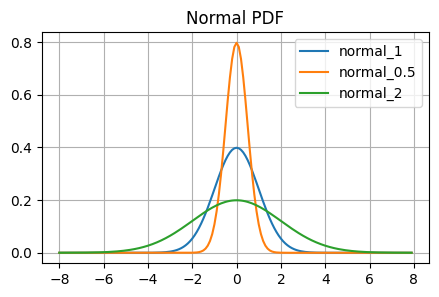

In [ ]:
# 표준정규분포 객체 생성 및 그래프 그리기 - loc, scale 대응
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mloc, mscale = 0, 1

rv = norm(loc=mloc, scale=mscale)  # loc=평균, scale=표준편차
x = np.arange(mloc-8*mscale, mloc+8*mscale, 0.1)  # 4표준편차 범위로 지정
y1 = rv.pdf(x)
y2 = norm.pdf(x, loc=mloc, scale=mscale*0.5)
y3 = norm.pdf(x, loc=mloc, scale=mscale*2)
df = pd.DataFrame()
df[f'normal_{mscale}'] = pd.Series(y1, index=x)
df[f'normal_{mscale*0.5}'] = pd.Series(y2, index=x)
df[f'normal_{mscale*2}'] = pd.Series(y3, index=x)
df.plot(title='Normal PDF', figsize=(5, 3), grid=True)
plt.show()

#### 2-2. Student t 분포

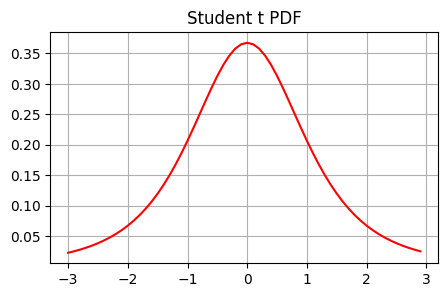

In [ ]:
# Student t 분포 객체 생성 및 그래프 그리기
from scipy.stats import t
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dof = 3
# 자유도가 dof 인 student t 확률분포 객체 만들기
rv = t(df=dof)  # loc=0, scale=1
x = np.arange(-3, 3, 0.1)
y = rv.pdf(x)
#print(x[:3], x[-3:])
student_t3 = pd.Series(y, index=x)
student_t3.plot(title='Student t PDF', figsize=(5, 3), grid=True, style='r-')
plt.show()

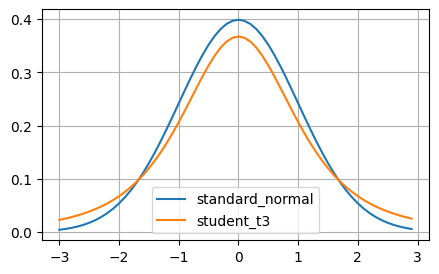

In [ ]:
# 표준정규분포와 스튜던트 t 분표 비교
from scipy.stats import norm, t
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dof = 3
rv_normal = norm() # loc=0, scale=1
rv_t3 = t(df=dof)  # loc=0, scale=1
x = np.arange(-3, 3, 0.1)
pdList = pd.DataFrame()
pdList['standard_normal'] = rv_normal.pdf(x)
pdList['student_t3'] = rv_t3.pdf(x)
pdList.index = x
pdList.plot(figsize=(5, 3), grid=True)
plt.show()

#### 2-3.지수분포


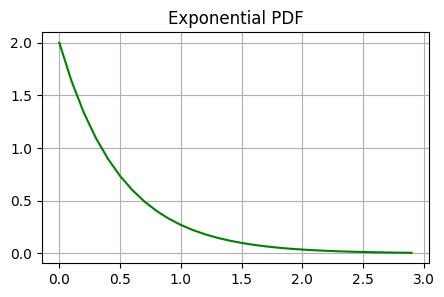

In [ ]:
# Exponential(지수)분포 객체 생성 및 그래프 그리기
from scipy.stats import expon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 포아송의 lambda (단위시간/단위공간에서 발생하는 사건의 평균 횟수)
e_lambda = 2  
#λ = e_lambda인 지수분포 객체만들기 
x = np.arange(0, 3, 0.1)
rv = expon(scale=1/e_lambda)
y = rv.pdf(x)
expon_s2 = pd.Series(y, index=x)
expon_s2.plot(title='Exponential PDF', figsize=(5, 3), grid=True, style='g-')
plt.show()

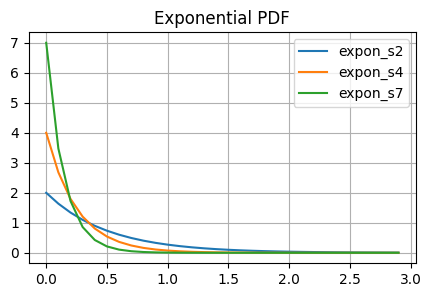

In [ ]:
# Exponential(지수)분포 객체 생성 및 그래프 그리기
from scipy.stats import expon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

e_lambda = 2  # 포아송의 lambda (단위시간/단위공간에서 발생하는 사건의 평균 횟수)
x = np.arange(0, 3, 0.1)
rv = expon(scale=1/e_lambda)
exp_df = pd.DataFrame()
exp_df['expon_s2'] = rv.pdf(x) 
exp_df['expon_s4'] = expon.pdf(x, scale=1/4)
exp_df['expon_s7'] = expon.pdf(x, scale=1/7)
exp_df.index = x
exp_df.plot(title='Exponential PDF', figsize=(5, 3), grid=True)
plt.show()

#### 2-4.감마분포

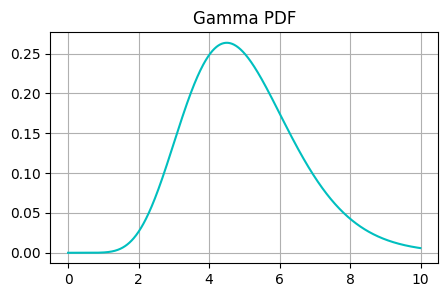

In [ ]:
# Gamma(감마)분포 객체 생성 및 그래프 그리기
from scipy.stats import gamma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
n, g_lambda = 10, 2
x = np.arange(0, 10, 0.01)
y = gamma(a=n, scale=1/g_lambda).pdf(x)
gm = pd.Series(y, index=x)
gm.plot(title='Gamma PDF', figsize=(5, 3), grid=True, style='c-')
plt.show()

### 3.이산형 확률분포 문제

CDF(Cumulative Distribution Function) : 누적 분포 함수
- 어떤 확률 분포에 대해 확률 변수가 특정 값보다 작거나 같은 확률
- f(x) = P(X <= x)
- CDF를 미분하면 PDF, PDF를 적분하면 CDF가 됨

### 3-1.기하분포 활용문제


#### 3-1a.이하일 확률
- geom(p).cdf(x)
- A씨가 계란후라이를 만들 때 노른자를 깨지 않을 확률이 0.2라고 한다. A씨가 적어도 5번 이내에 노른자를 깨지 않을 확률을 구하시오.

In [ ]:
from scipy.stats import geom
#pmf(1) + pmf(2) + .. + pmf(5)
result = round(geom(p=0.2).cdf(5), 4)
print(result)

0.6723


In [ ]:
rv = geom(p=0.2)
result = rv.pmf(1) + rv.pmf(2) + rv.pmf(3) + rv.pmf(4) + rv.pmf(5)
result = round(result, 4)
print(result)

0.6723


In [ ]:
rv = geom(p=0.2)
x = range(1, 6)
result = round(rv.pmf(x).sum(), 4)
print(result)

0.6723


#### 3-1b.이상일 확률
- 1 - geom(p).cdf(x)
- 빅데이터분석기사 실기 합격률은 35%라고 한다. 이 시험에 2번 이상 응시해야 자격증 취득에 성공할 확률을 구하시오.

In [ ]:
from scipy.stats import geom

result = round(1 - geom(p=0.35).cdf(1), 2)
print(result)

0.65


#### 3-1c. 특정 횟수일 확률
- geom(p).cdf(x) - geom(p).cdf(x-1)
- A 야구선수의 홈런 칠 확률이 5%일 때, 이 선수가 4번째 타석에서 홈런 칠 확률을 구하시오.

In [ ]:
from scipy.stats import geom

c = 0.05
result = round(geom(p=c).pmf(4), 4)
print(result)

0.0429


In [ ]:
from scipy.stats import geom

c = 0.05
rv = geom(p=c)
result = round(rv.cdf(4) - rv.cdf(3), 4)
print(result)

0.0429


###3-2.초기하분포 활용문제

In [ ]:
# 파란공, 빨간공 각 8개씩, 5개의 공을 비복원으로 뽑고
# 뽑은 공 중에서 3개 파란공, 2개 빨간 공일 확률
from scipy.stats import hypergeom
a, b, c = 16, 8, 5
rv = hypergeom(M=a, n=b, N=c)
round(rv.pmf(3), 5), round(rv.pmf(2), 5)

(0.35897, 0.35897)

#### 3-2a.이하일 확률
- hypergeom(M, n, N).cdf(x)
- 어느 회사에서 랜덤박스 선물셋트를 50개 준비했다. 선물셋트에 향수가 포함된 것이 8개 라고 한다. 비복원추출로 선물셋트 4개를 뽑았을 때, 향수가 포함된 선물이 2개 이하로 나올 확률을 구하시오.

In [ ]:
from scipy.stats import hypergeom
a, b, c = 50, 8, 4
result = round(hypergeom(M=a, n=b, N=c).cdf(2), 4)   # x=0, 1, 2
print(result)

0.9895


In [ ]:
from scipy.stats import hypergeom
a, b, c = 50, 8, 4
rv = hypergeom(M=a, n=b, N=c)
result = round(rv.pmf(0) + rv.pmf(1) + rv.pmf(2), 4)   # x=0, 1, 2
print(result)

0.9895


In [ ]:
from scipy.stats import hypergeom
a, b, c = 50, 8, 4
rv = hypergeom(M=a, n=b, N=c)
x = range(3)
result = round(rv.pmf(x).sum(), 4)   # x=0, 1, 2
print(result)

0.9895


#### 3-2b.이상일 확률
- 1 - hypergeom(M, n, N).cdf(x)
- 짱구엄마가 사과 20개와 배 8를 사왔다. 비복원추출로 사과와 배 5개를 집었을 때 배가 2개 이상일 확률을 구하시오.

In [ ]:
from scipy.stats import hypergeom
a, b, c = 28, 8, 5
result = round(1 - hypergeom(M=a, n=b, N=c).cdf(1), 4)
print(result)

0.4479


#### 3-3c.특정 횟수일 확률
- hypergeom(M, n, N).pmf(x)
- hypergeom(M, n, N).cdf(x) - hypergeom(M, n, N).cdf(x-1)
- 뽑기 기계에 꽝이 아닌 것이 10개, 꽝이 30개 포함되어 있다고 한다. 비복원추출로 4개를 뽑았을 때 이중 꽝이 아닌 것이 3개 나올 확률을 구하시오.

In [ ]:
from scipy.stats import hypergeom
a, b, c = 40, 10, 4
result = round(hypergeom(M=a, n=b, N=c).pmf(3), 4)
print(result)

0.0394


In [ ]:
from scipy.stats import hypergeom
a, b, c = 40, 10, 4
rv = hypergeom(M=a, n=b, N=c)
result = round(rv.cdf(3) - rv.cdf(2), 4)
print(result)

0.0394


### 3-3.포아송분포 활용문제

#### 3-3a.이하일 확률
- poisson(mu).cdf(x)
- 어느 AS센터에 1시간당 평균 180건의 전화가 온다. 이때 1분 동안 걸려오는 전화 요청이 4건 이하일 확률을 구하시오.

In [ ]:
from scipy.stats import poisson
mu = 180/60
result = poisson(mu=mu).cdf(4)
print(round(result, 4))

0.8153


####3-3b.이상일 확률
- 1- poisson(mu).cdf(x)
- 어느 가게에 1시간당 평균 8명의 손님이 온다. 이때, 1시간 동안 손님이 6명 이상 올 확률을 구하시오.

In [ ]:
from scipy.stats import poisson
mu = 8
result = 1 - poisson(mu=mu).cdf(5)
print(round(result, 4))

0.8088


#### 3-3c.특정 개수일 확률
- poisson(mu).pmf(x)
- poisson(mu).cdf(x) - poisson(mu).cdf(x-1)
- 출판사에서 원고 검수를 6 페이지 하였는데 오타가 총 12개 발견되었다고 한다. 이 원고에서 어떤 한 페이지를 검수하였을 때, 오타가 2개 나올 확률을 구하시오.


In [ ]:
from scipy.stats import poisson

mu=2
result = poisson(mu=mu).pmf(2)
print(round(result, 4))

0.2707


In [ ]:
from scipy.stats import poisson

mu=2
result = poisson(mu=mu).cdf(2) - poisson(mu=mu).cdf(1)
print(round(result, 4))

0.2707


## 4.연속형 확률분포 문제

### 4-1.정규분포 활용문제
- loc : 평균, scale : 표준편차
- x (확률변수) : 평균


#### 4-1a.이하일 확률
- norm(loc=평균, scale=표준편차).cdf(x) 사용
- Z회사의 USB 수명을 조사하였더니 USB의 평균 수명은 5000시간이고, 표준편차가 100시간인 정규분포를 따른다고 한다. USB의 수명이 4800시간 이하일 확률을 구하시오
 


In [ ]:
from scipy.stats import norm
mu = 5000
std = 100

result = norm(loc=mu, scale=std).cdf(4800)
print(round(result, 4))

0.0228


#### 4-1b.이상일 확률
- 1 - norm(loc=평균, scale=표준편차).cdf(x) 사용
- A씨는 냉장고의 수명을 조사하였다. 냉장고의 평균 수명은 10년이고, 표준편차가 2년인 정규분포를 따른다고 한다.  냉장고의 수명이 14년 이상일 확률을 구하시오.


In [ ]:
from scipy.stats import norm
mu = 10
std = 2

result = 1 - norm(loc=mu, scale=std).cdf(14)
print(round(result, 4))

0.0228


#### 4-1c.특정 구간일 확률
- norm(loc=평균, scale=표준편차).cdf(큰값) - norm(loc=평균, scale=표준편차).cdf(작은값)
- X회사에서 생산되는 계란은 평균 무게가 80g 이고 분산이 100g인 정규분포를 따른다고 한다. 계란의 평균 무게가 55g ~ 90g일 확률을 구하시오.


In [ ]:
from scipy.stats import norm

mu = 80
std = 100 ** 0.5
rv = norm(loc=mu, scale=std)
result = rv.cdf(90) - rv.cdf(55)
print(round(result, 4))

0.8351


#### 4-1d.정규분포 신뢰구간 
- (통계량 – 오차한계) ~ (통계량 + 오차한계)
- 오차한계 = 표본오차, 임계값 * 𝜎/√𝑛 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
- norm.interval(confidence, loc=mu, scale=stderr)
- norm.ppf((1+confidence)/2, loc=mu, scale=stderr)
- scipy.stats.sem(data)로 stderr 구하기 가능


어느 배 농장에서 수확한 배의 평균 무게(𝝁)에 대해 알아보기 위해 36개의 배를 추출하여 무게를측정하였더니 평균이 602g, 표준편차가 30g이 나왔다고 한다. 이때 배의 평균 무게 (𝝁) 의 95% 신뢰구간을 구하여라


In [ ]:
from scipy.stats import norm
n = 36
mu = 602
std = 30
confidence = 0.95
stderr = std/n**0.5
a, b = norm.interval(confidence, loc=mu, scale=stderr)
print(round(a, 4), round(b, 4))

592.2002 611.7998


In [ ]:
from scipy.stats import norm
# ppf 사용
from scipy.stats import norm
n = 36
mu = 602
std = 30
confidence = 0.95
stderr = std/n**0.5
alpha = (1 - confidence) / 2
a, b = norm.ppf([alpha, confidence+alpha], loc=mu, scale=stderr)
print(round(a, 4), round(b, 4))

592.2002 611.7998


In [ ]:
confidence = 0.95
alpha1 = (1 - confidence) / 2
alpha2 = (1 + confidence) / 2  # confidence+alpha
print(alpha1, alpha2)

0.025000000000000022 0.975


### 4-2.t분포 활용문제

#### 4-2a.이하일 확률
상수원 수질을 나타내는 수치 중 하나로 ‘단위부피당 평균 세균수’가 있으며, A 호수의 10곳의 수질을 조사한 단위 부피당 세균수가 a.csv 파일에 기록되어 있다. 이 자료로부터 호수의 단위부피당 평균 세균수(𝝁)가 200 이하일 확률을 구하라.


In [ ]:
import pandas as pd
from scipy.stats import t

# data_02/a.csv
s = pd.read_csv('data_02/a.csv')['water_quality']
mu, std = s.agg(['mean', 'std'])
rv = t(df=len(s)-1, loc=mu, scale=std)
print(round(rv.cdf(200), 4))    # 200 이하일 확률 
print(round(1-rv.cdf(200), 4))    # 200 이상일 확률 
print(round(rv.cdf(220) - rv.cdf(190), 4))    # 190 ~ 220 구간일 확률 

0.6493
0.3507
0.5947


#### 4-2b.t분포 신뢰구간
모평균이 𝝁, 표준편차가 𝝈=8 인 정규분포를 따르는 모집단이 있다.  이 모집단에서 크기가 25인 표본을 추출하여 구한 평균이 42.7이었다. 이때, 모평균 𝝁 이 위치할 95% 신뢰도의 
신뢰구간을 구하라.

In [ ]:
from scipy.stats import t
# interval
n = 25
mu = 42.7
std = 8
confidence = 0.95
stderr = std / (n**0.5)
A, B = t(df=n-1).interval(confidence, loc=mu, scale=stderr)
print(f'{A:.4f} ~ {B:.4f}')

39.3978 ~ 46.0022


In [ ]:
from scipy.stats import t
# ppf
n = 25
mu = 42.7
std = 8
confidence = 0.95
stderr = std / (n**0.5)
alpha = (1 - confidence) / 2
A, B = t.ppf([alpha, confidence+alpha], df=n-1, loc=mu, scale=stderr)
print(f'{A:.4f} ~ {B:.4f}')

39.3978 ~ 46.0022


#### 4-2c.t분포 신뢰구간
우주선 제작에 사용되는 합금의 평균 장력 𝝁 를 추정하고자 한다. 15개의 새 합금조각으로부터 장력을 측정한 결과 
평균이 39.3, 표준편차가 2.6으로 나타났다. 합금의 평균 장력 𝝁에 대한 90% 신뢰구간을 구하라. 


In [ ]:
from scipy.stats import t
# interval

n = 15
mu = 39.3
std = 2.6
confidence = 0.9
stderr = std / (n**0.5)
#A, B = t(df=n-1).interval(confidence, loc=mu, scale=stderr)
A, B = t.interval(confidence, df=n-1, loc=mu, scale=stderr)
print(f'{A:.4f} ~ {B:.4f}')   # 95% 37.8602 ~ 40.7398,  90% 38.1176 ~ 40.4824

38.1176 ~ 40.4824


In [ ]:
from scipy.stats import t
# ppf
n = 15
mu = 39.3
std = 2.6
confidence = 0.9
stderr = std / (n**0.5)
alpha = (1-confidence) / 2
A, B = t.ppf([alpha, confidence+alpha], df=n-1, loc=mu, scale=stderr)
print(f'{A:.4f} ~ {B:.4f}')

38.1176 ~ 40.4824


#### 4-2d.20대 수면시간 - t분포 사용
- interval(confidence, df, loc=0, scale=1)
- 20대 수면 평균 시간(𝝁)에 대해 추정하고자 한다.  sleepage.csv에 'stime20s' column을 사용하여, 20대 수면 평균 시간에 대해 99% 신뢰구간을 구하라.

In [ ]:
import pandas as pd
from scipy.stats import t, sem

sleep = pd.read_csv('data_02/sleepage.csv')['stime20s']
n = len(sleep)
mu, std = sleep.agg(['mean', 'std'])
confidence = 0.99
stderr = sem(sleep)
A, B = t.interval(confidence, df=n-1, loc=mu, scale=stderr)
print(f'{A:.4f} ~ {B:.4f}')

5.2154 ~ 7.0846


ppf를 사용하는 방법

In [ ]:
import pandas as pd
from scipy.stats import t, sem

sleep = pd.read_csv('data_02/sleepage.csv')['stime20s']
n = len(sleep)
mu, std = sleep.agg(['mean', 'std'])
confidence = 0.99
stderr = sem(sleep)
alpha = (1-confidence) / 2
A, B = t.ppf([alpha, confidence + alpha], df=n-1, loc=mu, scale=stderr)
print(f'{A:.4f} ~ {B:.4f}')

5.2154 ~ 7.0846


In [ ]:
import pandas as pd
from scipy.stats import t, sem

def get_t_interval(n, mu, std, confidence):
    stderr = std / (n**0.5)
    alpha = (1-confidence) / 2
    A, B = t.ppf([alpha, confidence + alpha], df=n-1, loc=mu, scale=stderr)
    return A, B

sleep = pd.read_csv('data_02/sleepage.csv')['stime20s']
A, B = get_t_interval(len(sleep), sleep.mean(), sleep.std(), 0.99)
print(f'{A:.4f} ~ {B:.4f}')

5.2154 ~ 7.0846


In [ ]:
import pandas as pd
from scipy.stats import t, sem

def get_t_interval2(sleep, confidence):
    n = len(sleep)
    mu, std = sleep.agg(['mean', 'std'])
    stderr = sem(sleep)
    alpha = (1-confidence) / 2
    A, B = t.ppf([alpha, confidence + alpha], df=n-1, loc=mu, scale=stderr)
    return A, B

sleep = pd.read_csv('data_02/sleepage.csv')['stime20s']
A, B = get_t_interval2(sleep, 0.99)
print(f'{A:.4f} ~ {B:.4f}')

5.2154 ~ 7.0846


### 4-3.지수분포 활용문제
- 단위 시간당 발생하는 평균 사건의 수 : λ 
- 발생하는 사건들 사이의 시간 : x (확률변수)


#### 4-3a.이하일 확률
- expon(scale=1/λ).cdf(x) 사용
- 전자 제품의 5년간 고장횟수가 평균 1회이고, 지수분포를 따른다. 1년 안에 고장 날 확률을 구하시오.


In [ ]:
from scipy.stats import expon

# 단위 시간 : 년
e_lambda = 1/5
result = expon(scale=1/e_lambda).cdf(1).round(4)
print(result)

0.1813


In [ ]:
from scipy.stats import expon

# 단위 시간 : 년
e_lambda = 5
result = expon(scale=e_lambda).cdf(1).round(4)
print(result)

0.1813


#### 4-3b.이상일 확률
- 1 - expon(scale=1/λ).cdf(x) 사용
- 어느 회사에서 생산하는 냉장고 평균수명은 10년이고, 지수분포를 따른다. 이 냉장고의 수명이 10년 이상 지속될 확률을 구하시오.

In [ ]:
from scipy.stats import expon

# 단위 시간 : 년
e_lambda = 1/10
result = (1 - expon(scale=1/e_lambda).cdf(10)).round(4)
print(result)

0.3679


In [ ]:
from scipy.stats import expon

# 단위 시간 : 년
e_lambda = 10
result = (1 - expon(scale=e_lambda).cdf(10)).round(4)
print(result)

0.3679


#### 4-3c.특정 구간일 확률
- expon(scale=1/λ).cdf(큰값) - expon(scale=1/λ).cdf(작은값)
- 어느 커피샵에서 커피를 구입하기 위해 대기하는 시간이 평균 7분이고, 지수분포를 따른다. 
이 커피샵에 갔을 때 대기하는 시간이 4분에서 10분일 확률을 구하시오.

In [ ]:
from scipy.stats import expon

# 단위 시간 : 분
e_lambda = 1/7
result = expon(scale=1/e_lambda).cdf(10) - expon(scale=1/e_lambda).cdf(4)
print(round(result, 4))

0.3251


In [ ]:
from scipy.stats import expon

# 단위 시간 : 분
e_lambda = 1/7
rv = expon(scale=1/e_lambda)
result = (rv.cdf(10) - rv.cdf(4)).round(4)
print(result)

0.3251


In [ ]:
from scipy.stats import expon

# 단위 시간 : 분
e_lambda = 7
rv = expon(scale=e_lambda)
result = (rv.cdf(10) - rv.cdf(4)).round(4)
print(result)

0.3251


### 4-4.감마분포 활용문제
- 확률변수 x = 𝜶 개의 사건이 발생할 때까지 걸리는 시간 (어떤 사건이 여러 번 발생하는 데 걸리는 시간)
- n: 사건발생건수, λ : 단위시간/공간 당 발생하는 사건 평균 건 수

#### 4-4a.이하일 확률
- gamma(a=n, scale=1/λ)
- A씨는 한 시간에 평균 6개의 택배를 배송한다. 30개의 택배를 배송할 때 걸리는 시간이 5시간 이하로 소요될 확률을 구하시오. 

In [ ]:
from scipy.stats import gamma

# 단위시간 : hour(시간)
n = 30
g_lambda = 6
result = gamma(a=n, scale=1/g_lambda).cdf(5).round(4)
print(result)

0.5243


#### 4-4b.이상일 확률
- 1 - gamma(a=n, scale=1/λ).cdf(x)
- B은행은 한 명의 고객응대에 평균 5분이 소요된다.  이 은행에서 30명의 고객응대에 2시간 이상으로 소요될 확률을 구하시오. 

In [ ]:
from scipy.stats import gamma

# 단위시간 : hour(시간)
n = 30
g_lambda = 60/5  # 12
result = (1 - gamma(a=n, scale=1/g_lambda).cdf(2)).round(4)
print(result)

0.8679


#### 4-4c.특정 구간일 확률
- gamma(a=n, scale=1/λ).cdf(큰값) - gamma(a=n, 1/λ).cdf(작은값)
- C씨는 비즈 목걸이를 만드는데 평균 30분 걸린다.  5개 비즈 목걸이를 만들 때까지 걸리는 시간이 2시간에서 4시간 사이 소요될 확률을 구하시오

In [ ]:
from scipy.stats import gamma

# 단위시간 : hour(시간)
n = 5
g_lambda = 2

rv = gamma(a=n, scale=1/g_lambda)
result = (rv.cdf(4) - rv.cdf(2)).round(4)
print(result)

0.5292


In [ ]:
####  카이제곱, F분포 등을 추가해 보려고 합니다. (우선 모수, 비모수 검정을 녹화합니다)